In [203]:
import pandas as pd
data = pd.read_csv("benchmarks.csv")


In [204]:
data = data[data['benchName'] == "103.su2cor"]

In [205]:
data['date'] = 0

In [206]:
def extract_dates(data):
    string = data['testID']
    if string[0] == 'p':
        return 0
    else:
        #Extract the date string (8 characters)
        dash = [pos for pos, char in enumerate(string) if char == "-"]
        assert len(dash) == 2
        if dash[1] - dash[0] != 9:
            if string[dash[0]+1] == "9":
                date_string = ("19"+string[dash[0]+1:dash[1]])
            else:
                date_string = ("20"+string[dash[0]+1:dash[1]])
        else:
            date_string = (string[dash[0]+1:dash[1]])
    #Convert the date string into a float 
    date = int(date_string[0:4])
    date += (float(date_string[4:6])-1)/12
    date += (float(date_string[6:])-1)/365
    return date

In [207]:
data = data.assign(date=data.apply(extract_dates, axis=1))

# dates = dates[dates != 0]

In [208]:
data =data[data['date']!=0]

In [165]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)

[  1.86681859e-01  -3.72053856e+02]


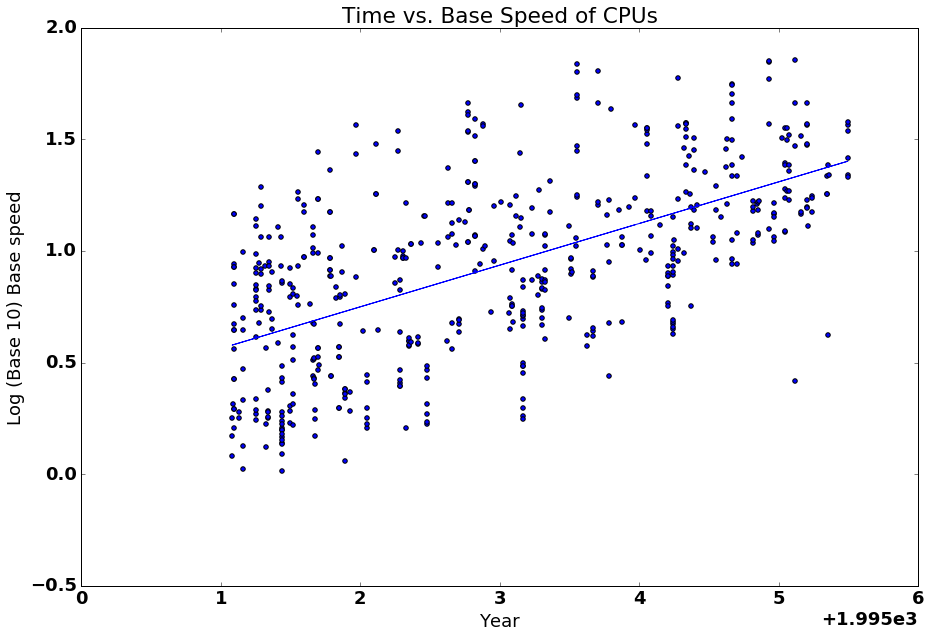

In [209]:
plt.figure(figsize=(15,10))
plt.scatter(data['date'], np.log10(data['base'])) # Use semilog plotJ
ax = plt.gca()
# ax.set_yscale('log')
plt.xlabel("Year")
plt.ylabel("Log (Base 10) Base speed")
fit = np.polyfit(data['date'], np.log10(data['base']),1)
print fit
fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y
plt.title("Time vs. Log (Base 10) Base Speed of CPUs")
plt.plot(data['date'], fit_fn(data['date']))
plt.show()

We can see that the coefficients for the linear fit are $1.87\cdot 10^{-1}, -3.72\cdot 10^{2}$. This implies that $\log y = 1.87\cdot 10^{-1} \cdot x - 3.72\cdot 10^{2}$ or $y = 2.77\cdot 10^{-162} e^{0.187x}$. Thus, the time period for doubling of the base speed is $\frac{1000\log 2}{187} = 3.7 years.$ Moore's law states that the number of computer transistor doubles every 18 months. While the two metrics base speed and number of transistors might not be exactly comparable, we can see the timelines are roughly equal, and that the linear model being successfully fitted suggests exponential growth.